#### ML : Decision Tree

พัชรพล อ่วมโอฬาร 6210422018

In [1]:
import pandas as pd
from matplotlib.pylab import rcParams
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
rcParams['figure.figsize'] = 10,10

In [3]:
def convert_stdZ(data, headers):
    df_std = StandardScaler().fit_transform(data)
    df_ret_std = pd.DataFrame(df_std, columns=headers)
    return df_ret_std

#### โหลดไฟล์

In [4]:
# IMPORT FROM LOCAL FILE (Downloaded form webSite)
pathStr = 'source'
filename = pathStr+'\wine.data'

In [5]:
col_name = ['CLASS','ALC','MLA','ASH','AOA','MAG','PHE','FLA','NFL','PRO','COL','HUE','ODW','PRL']

In [6]:
df_wine = pd.read_csv(filename, sep=',', lineterminator='\n', header=None, names=col_name)

In [7]:
df_wine.head(5)

,CLASS,ALC,MLA,ASH,AOA,MAG,PHE,FLA,NFL,PRO,COL,HUE,ODW,PRL
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )<br>
<ol>
    <li>ALC = Alcohol</li>
    <li>MLA = Malic acid</li>
    <li>ASH	= Ash</li>
    <li>AOA = Alcalinity of ash</li>
    <li>MAG = Magnesium</li>
    <li>PHE = Total phenols</li>
    <li>FLA = Flavanoids</li>
    <li>NFL = Nonflavanoid phenols</li>
    <li>PRO = Proanthocyanins</li>
    <li>COL = Color intensity</li>
    <li>HUE = Hue</li>
    <li>ODW = OD280/OD315 of diluted wines</li>
    <li>PRL = Proline</li>
</ol>

#### Data preprocessing

In [8]:
target = df_wine['CLASS']

In [9]:
data = df_wine.drop('CLASS', axis=1)

In [10]:
cols = list(data.columns)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [12]:
X_Result = X_test.copy()

Standardized data

In [13]:
X_train = convert_stdZ(X_train, cols)
X_test = convert_stdZ(X_test, cols)

#### Build model

รัน Hyperparamter

In [14]:
params = {
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4]
}

In [15]:
DtClf = tree.DecisionTreeClassifier()

In [16]:
grid_search_cv = GridSearchCV(DtClf, params, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:    4.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

รันโมเดลจริง ด้วยค่า Hyperparamter ที่ทำให้โมเดลแม่นที่สุด

In [17]:
model_dtCls = tree.DecisionTreeClassifier(max_leaf_nodes=6, min_samples_split=2)
model_dtCls.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(279.0, 475.65000000000003, 'COL <= -0.533\nentropy = 0.659\nsamples = 142\nvalue = [45, 57, 40]\nclass = 2'),
 Text(167.39999999999998, 339.75, 'PRL <= 0.888\nentropy = 0.109\nsamples = 52\nvalue = [3, 49, 0]\nclass = 2'),
 Text(111.6, 203.85000000000002, 'ASH <= 2.549\nentropy = 0.039\nsamples = 50\nvalue = [1, 49, 0]\nclass = 2'),
 Text(55.8, 67.94999999999999, 'entropy = 0.0\nsamples = 49\nvalue = [0, 49, 0]\nclass = 2'),
 Text(167.39999999999998, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 1'),
 Text(223.2, 203.85000000000002, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = 1'),
 Text(390.59999999999997, 339.75, 'FLA <= -0.602\nentropy = 0.577\nsamples = 90\nvalue = [42, 8, 40]\nclass = 1'),
 Text(334.79999999999995, 203.85000000000002, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = 3'),
 Text(446.4, 203.85000000000002, 'PRL <= -0.035\nentropy = 0.269\nsamples = 50\nvalue = [42, 8, 0]\nclass = 1'),
 Text(390.59999999999997, 67

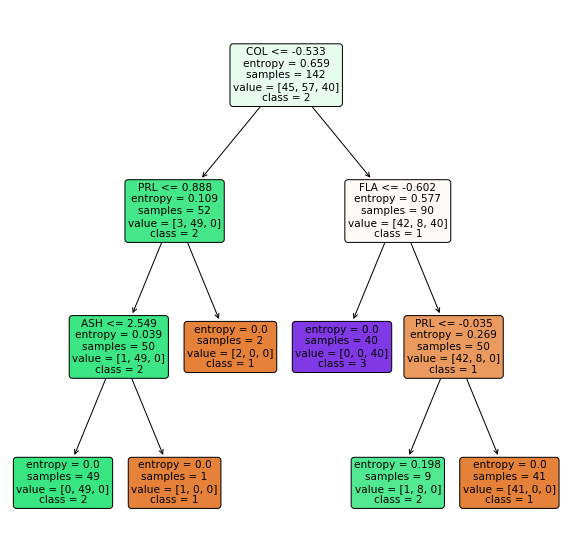

In [18]:
tree.plot_tree(model_dtCls, filled=True, rounded=True, feature_names=cols, class_names=['1','2','3']) 

จาก Diagram จะพบว่าโมเดลแบ่ง Node ตามเงื่อนไขของ Feature COL,PRL,FLA,ASH โดยการแบ่งฝั่งซ้าย เป็น True ฝั่งขวา เป็น False<br>
การแบ่งจะแบ่งจนกว่าค่า Entropy = 0 ซึ่ง Node นั้นไม่สามารถแบ่งได้อีก

#### วัดผลการทำนายของโมเดล

In [19]:
mean_acc = model_dtCls.score(X_test, y_test)
print(f'Mean accuracy : {mean_acc:.4f}')

Mean accuracy : 0.9444


ทดลองจัดกลุ่มโดยใช้ X_test เป็นตัวแปรต้น

In [20]:
X_Result['Class_Predict'] = model_dtCls.predict(X_test)

In [21]:
X_Result_transform = X_Result[['Class_Predict','ASH','FLA','COL','PRL']]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


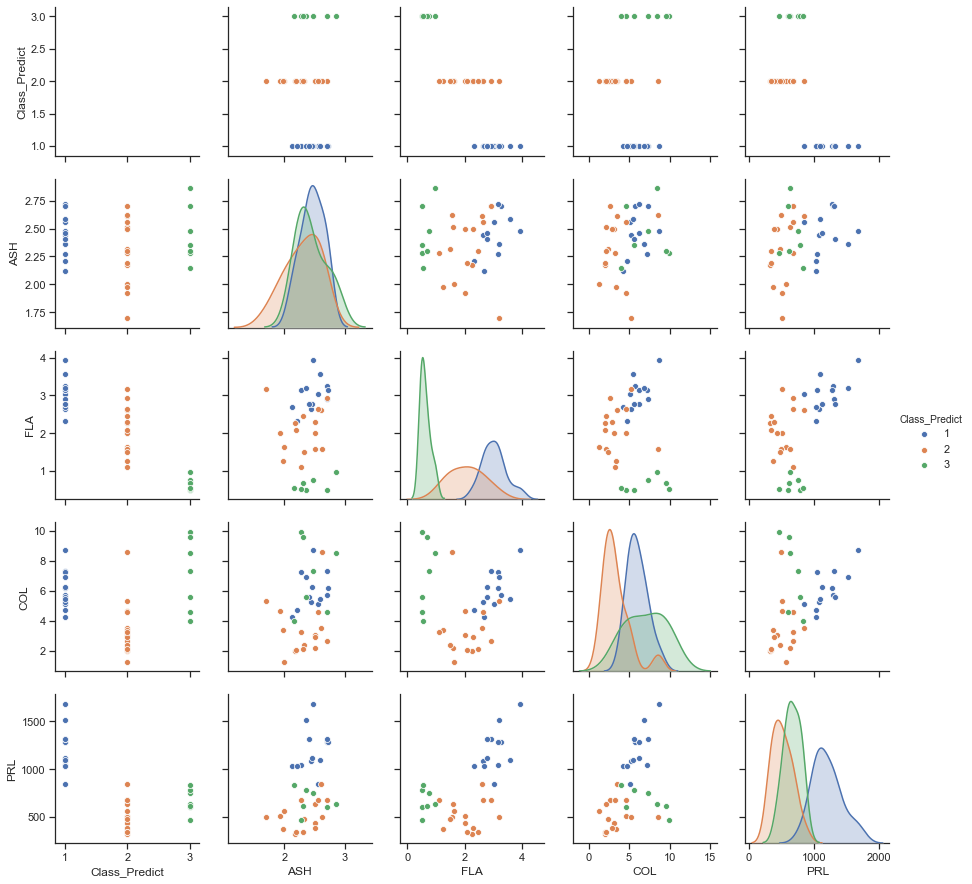

In [22]:
sns.set(style="ticks")
sns.pairplot(X_Result_transform, hue="Class_Predict")

<ol>
    <li>MLA = Malic acid</li>
    <li>AOA = Alcalinity of ash</li>
    <li>NFL = Nonflavanoid phenols</li>
    <li>COL = Color intensity</li>
</ol>

In [23]:
X_Result['Actual'] = y_test

In [24]:
X_Result.head(10)

,ALC,MLA,ASH,AOA,MAG,PHE,FLA,NFL,PRO,COL,HUE,ODW,PRL,Class_Predict,Actual
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,1,1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,1,1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,3,3
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,1,1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,2,2
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280,1,1
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,2,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,3
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680,2,2
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780,3,3
